In [6]:
import pandas as pd


In [8]:
# Caricamento Netflix_FINAL_news.csv
df_nflx_news = pd.read_csv("Netflix_FINAL_news.csv")

print("Netflix_FINAL_news.csv caricato.")
print("\nColonne presenti:")
print(df_nflx_news.columns)

# Parsing date e ordinamento
df_nflx_news["date"] = pd.to_datetime(df_nflx_news["date"])
df_nflx_news = df_nflx_news.sort_values("date")

print("\nPrime righe:")
df_nflx_news.head()

Netflix_FINAL_news.csv caricato.

Colonne presenti:
Index(['date', 'Ticker', 'price_Nflx', 'log_return', 'vol_5d', 'vol_10d',
       'news_volume', 'sentiment_distilbert', 'sentiment_xlm', 'MDI_news',
       'gdelt_volume', 'gdelt_index_pct'],
      dtype='object')

Prime righe:


,date,Ticker,price_Nflx,log_return,vol_5d,vol_10d,news_volume,sentiment_distilbert,sentiment_xlm,MDI_news,gdelt_volume,gdelt_index_pct
0,2022-04-19,Netflix,34.861000,0.031322,0.024,0.021,34,-0.794,-0.382,0.553,1400,38.620690
1,2022-04-20,Netflix,22.618999,-0.432578,0.196,0.135,47,-0.840,-0.489,0.537,3625,100.000000
2,2022-04-21,Netflix,21.822001,-0.035872,0.191,0.135,19,-0.605,-0.450,0.611,1855,51.172414
3,2022-04-22,Netflix,21.552000,-0.012450,0.192,0.135,10,-0.800,-0.447,0.553,1340,36.965517
4,2022-04-23,Netflix,NaN,NaN,NaN,NaN,4,-1.000,-0.261,0.739,848,23.393103


In [10]:
# Caricamento GDELT_NETFLIX_Analysis.csv
df_nflx_gdelt = pd.read_csv("GDELT_NETFLIX_Analysis.csv", sep=';')

print("GDELT_NETFLIX_Analysis.csv caricato.")
print("\nColonne presenti:")
print(df_nflx_gdelt.columns)

# Rinominare la colonna 'day' in 'date' per coerenza
df_nflx_gdelt = df_nflx_gdelt.rename(columns={'day': 'date'})

df_nflx_gdelt["date"] = pd.to_datetime(df_nflx_gdelt["date"])
df_nflx_gdelt = df_nflx_gdelt.sort_values("date")

print("\nPrime righe:")
df_nflx_gdelt.head()

GDELT_NETFLIX_Analysis.csv caricato.

Colonne presenti:
Index(['day', 'gdelt_volume', 'gdelt_index_pct'], dtype='object')

Prime righe:


,date,gdelt_volume,gdelt_index_pct
0,2022-04-19,1400,38.620690
1,2022-04-20,3625,100.000000
2,2022-04-21,1855,51.172414
3,2022-04-22,1340,36.965517
4,2022-04-23,848,23.393103


In [12]:
# Merge Netflix + GDELT e dataset per correlazioni
col_gdelt_nflx = "gdelt_volume_y"

# Selezione GDELT
df_nflx_gdelt_small = df_nflx_gdelt[["date", "gdelt_volume"]]

# Merge su base giornaliera
df_nflx_merged = pd.merge(df_nflx_news, df_nflx_gdelt_small, on="date", how="left")

print("Merge Netflix completato.")
print("\nColonne dopo il merge:")
print(df_nflx_merged.columns)

# Dataset per correlazioni
cols_nflx = ["vol_5d", "news_volume", "MDI_news", col_gdelt_nflx]
df_corr_nflx = df_nflx_merged[cols_nflx].dropna()

print("\nDataset per correlazioni – Netflix:")
df_corr_nflx.head(), len(df_corr_nflx)

Merge Netflix completato.

Colonne dopo il merge:
Index(['date', 'Ticker', 'price_Nflx', 'log_return', 'vol_5d', 'vol_10d',
       'news_volume', 'sentiment_distilbert', 'sentiment_xlm', 'MDI_news',
       'gdelt_volume_x', 'gdelt_index_pct', 'gdelt_volume_y'],
      dtype='object')

Dataset per correlazioni – Netflix:


(   vol_5d  news_volume  MDI_news  gdelt_volume_y
 0   0.024           34     0.553            1400
 1   0.196           47     0.537            3625
 2   0.191           19     0.611            1855
 3   0.192           10     0.553            1340
 6   0.190            7     0.515             883,
 11)

In [16]:
# Procedimento analogo per SVB
# NEWS SVB
df_svb_news = pd.read_csv("SVB_FINAL_news.csv")
print("SVB_FINAL_news.csv caricato.")
print(df_svb_news.columns)

df_svb_news["date"] = pd.to_datetime(df_svb_news["date"])
df_svb_news = df_svb_news.sort_values("date")

# GDELT SVB
df_svb_gdelt = pd.read_csv("GDELT_SVB_Analysis.csv", sep=';') # Specify semicolon separator
print("\n GDELT_SVB_Analysis.csv caricato.")
print(df_svb_gdelt.columns)

# Rinominare la colonna 'day' in 'date' per coerenza
df_svb_gdelt = df_svb_gdelt.rename(columns={'day': 'date'})

df_svb_gdelt["date"] = pd.to_datetime(df_svb_gdelt["date"])
df_svb_gdelt = df_svb_gdelt.sort_values("date")

col_gdelt_svb = "gdelt_volume_y" # Changed to 'gdelt_volume_y' after merge

df_svb_gdelt_small = df_svb_gdelt[["date", "gdelt_volume"]]

# Merge
df_svb_merged = pd.merge(df_svb_news, df_svb_gdelt_small, on="date", how="left")

print("\nColonne dopo il merge SVB:")
print(df_svb_merged.columns)

# Dataset per correlazioni
cols_svb = ["vol_5d", "news_volume", "MDI_news", col_gdelt_svb]
df_corr_svb = df_svb_merged[cols_svb].dropna()

print("\nDataset per correlazioni – SVB:")
df_corr_svb.head(), len(df_corr_svb)

SVB_FINAL_news.csv caricato.
Index(['date', 'Ticker', 'price_Kre', 'log_return', 'vol_5d', 'vol_10d',
       'news_volume', 'sentiment_distilbert', 'sentiment_xlm', 'MDI_news',
       'gdelt_volume', 'gdelt_index_pct'],
      dtype='object')

 GDELT_SVB_Analysis.csv caricato.
Index(['day', 'gdelt_volume', 'gdelt_index_pct'], dtype='object')

Colonne dopo il merge SVB:
Index(['date', 'Ticker', 'price_Kre', 'log_return', 'vol_5d', 'vol_10d',
       'news_volume', 'sentiment_distilbert', 'sentiment_xlm', 'MDI_news',
       'gdelt_volume_x', 'gdelt_index_pct', 'gdelt_volume_y'],
      dtype='object')

Dataset per correlazioni – SVB:


(   vol_5d  news_volume  MDI_news  gdelt_volume_y
 0   0.032           33     0.395            1208
 3   0.049           95     0.516            6231
 4   0.061           54     0.529            5228
 5   0.059           47     0.552            4160
 6   0.066           34     0.477            3976,
 6)

In [20]:
# Correlazioni
def stampa_correlazioni(df, nome):
    print(f"\n")
    print(f"CORRELAZIONI – {nome}")
    print("")

    pearson_corr = df.corr(method="pearson").round(3)
    print("\nPearson:")
    print(pearson_corr)

    spearman_corr = df.corr(method="spearman").round(3)
    print("\nSpearman:")
    print(spearman_corr)
    return pearson_corr, spearman_corr


corr_nflx_pearson, corr_nflx_spearman = stampa_correlazioni(df_corr_nflx, "Netflix")
corr_svb_pearson, corr_svb_spearman = stampa_correlazioni(df_corr_svb, "SVB")



CORRELAZIONI – Netflix


Pearson:
                vol_5d  news_volume  MDI_news  gdelt_volume_y
vol_5d           1.000        0.295    -0.339           0.400
news_volume      0.295        1.000    -0.246           0.859
MDI_news        -0.339       -0.246     1.000          -0.227
gdelt_volume_y   0.400        0.859    -0.227           1.000

Spearman:
                vol_5d  news_volume  MDI_news  gdelt_volume_y
vol_5d           1.000        0.460    -0.556           0.309
news_volume      0.460        1.000    -0.309           0.621
MDI_news        -0.556       -0.309     1.000          -0.287
gdelt_volume_y   0.309        0.621    -0.287           1.000


CORRELAZIONI – SVB


Pearson:
                vol_5d  news_volume  MDI_news  gdelt_volume_y
vol_5d           1.000       -0.200     0.778           0.453
news_volume     -0.200        1.000     0.149           0.775
MDI_news         0.778        0.149     1.000           0.615
gdelt_volume_y   0.453        0.775     0.615        

In [27]:
# Netflix
corr_nflx_pearson.to_csv("Table_A1_Pearson_Netflix.csv")
corr_nflx_spearman.to_csv("Table_A2_Spearman_Netflix.csv")

# SVB
corr_svb_pearson.to_csv("Table_A1_Pearson_SVB.csv")
corr_svb_spearman.to_csv("Table_A2_Spearman_SVB.csv")

print("Tabelle di correlazione salvate correttamente:")
print("- Table_A1_Pearson_Netflix.csv")
print("- Table_A2_Spearman_Netflix.csv")
print("- Table_A1_Pearson_SVB.csv")
print("- Table_A2_Spearman_SVB.csv")

Tabelle di correlazione salvate correttamente:
- Table_A1_Pearson_Netflix.csv
- Table_A2_Spearman_Netflix.csv
- Table_A1_Pearson_SVB.csv
- Table_A2_Spearman_SVB.csv


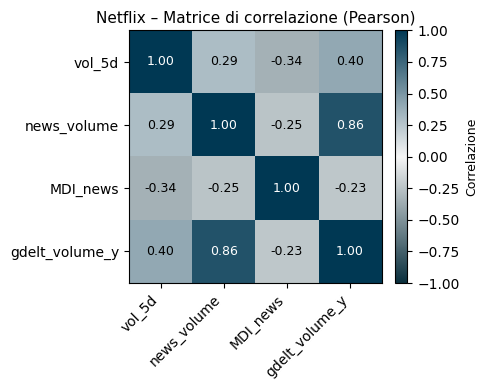

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Ordine delle variabili (coerente con il paper)
variabili = ["vol_5d", "news_volume", "MDI_news", "gdelt_volume_y"]

# Netflix:
corr_mat = corr_nflx_pearson.loc[variabili, variabili]
titolo = "Netflix – Matrice di correlazione (Pearson)"

# SVB:

# Colormap
petrol_cmap = LinearSegmentedColormap.from_list(
    "petrol",
    ["#0a2f3d", "#f5f5f5", "#003853"],
    N=256
)

fig, ax = plt.subplots(figsize=(5, 4))

im = ax.imshow(
    corr_mat.values,
    cmap=petrol_cmap,
    vmin=-1,
    vmax=1
)

# Tick e label
ax.set_xticks(np.arange(len(variabili)))
ax.set_yticks(np.arange(len(variabili)))
ax.set_xticklabels(variabili, rotation=45, ha="right")
ax.set_yticklabels(variabili)

# Valori numerici nelle celle
for i in range(len(variabili)):
    for j in range(len(variabili)):
        val = corr_mat.values[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            fontsize=9,
            color="white" if abs(val) > 0.55 else "black"
        )

ax.set_title(titolo, fontsize=11)

# Colorbar sobria
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlazione", fontsize=9)

plt.tight_layout()
plt.show()

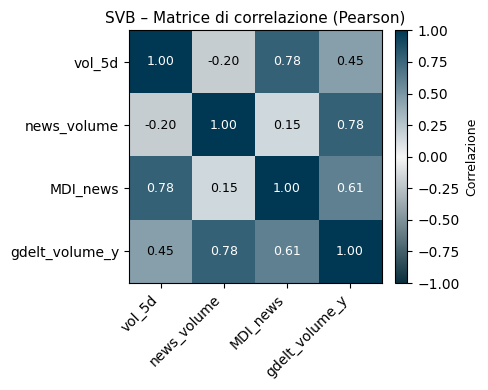

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Ordine delle variabili (stesso ordine di Netflix)
variabili = ["vol_5d", "news_volume", "MDI_news", "gdelt_volume_y"]

# Matrice di correlazione Pearson per SVB
corr_mat_svb = corr_svb_pearson.loc[variabili, variabili]

# Colormap personalizzata blu petrolio
petrol_cmap = LinearSegmentedColormap.from_list(
    "petrol",
    ["#0a2f3d", "#f5f5f5", "#003853"],
    N=256
)

fig, ax = plt.subplots(figsize=(5, 4))

im = ax.imshow(
    corr_mat_svb.values,
    cmap=petrol_cmap,
    vmin=-1,
    vmax=1
)

# Tick e label
ax.set_xticks(np.arange(len(variabili)))
ax.set_yticks(np.arange(len(variabili)))
ax.set_xticklabels(variabili, rotation=45, ha="right")
ax.set_yticklabels(variabili)

# Valori numerici nelle celle
for i in range(len(variabili)):
    for j in range(len(variabili)):
        val = corr_mat_svb.values[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            fontsize=9,
            color="white" if abs(val) > 0.55 else "black"
        )

ax.set_title("SVB – Matrice di correlazione (Pearson)", fontsize=11)

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlazione", fontsize=9)

plt.tight_layout()
plt.show()

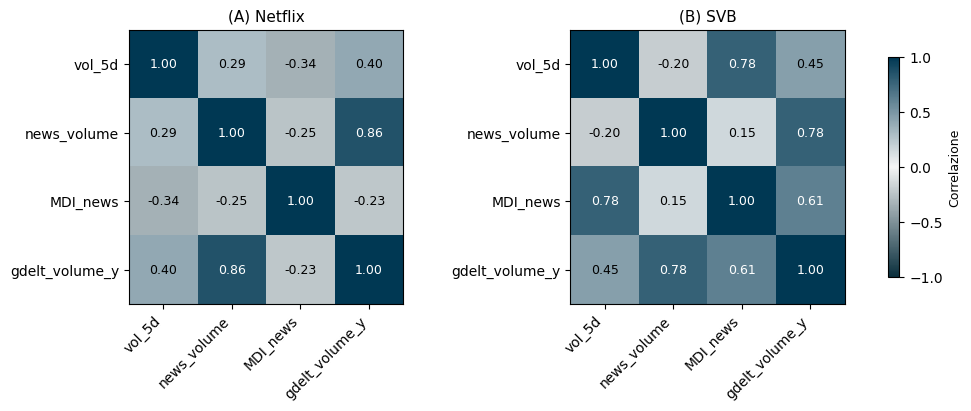

Figura salvata come 'Fig4_Correlation_Heatmaps_Netflix_SVB.png'


In [26]:
# Figura unica – PANEL A (Netflix) & PANEL B (SVB)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Ordine coerente delle variabili
variabili = ["vol_5d", "news_volume", "MDI_news", "gdelt_volume_y"]

# Matrici di correlazione Pearson
corr_nflx = corr_nflx_pearson.loc[variabili, variabili]
corr_svb  = corr_svb_pearson.loc[variabili, variabili]

# Colormap blu petrolio
petrol_cmap = LinearSegmentedColormap.from_list(
    "petrol",
    ["#0a2f3d", "#f5f5f5", "#003853"],
    N=256
)

# Creazione figura con due pannelli
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

for ax, corr_mat, title in zip(
    axes,
    [corr_nflx, corr_svb],
    ["(A) Netflix", "(B) SVB"]
):
    im = ax.imshow(corr_mat.values, cmap=petrol_cmap, vmin=-1, vmax=1)

    ax.set_xticks(np.arange(len(variabili)))
    ax.set_yticks(np.arange(len(variabili)))
    ax.set_xticklabels(variabili, rotation=45, ha="right")
    ax.set_yticklabels(variabili)

    for i in range(len(variabili)):
        for j in range(len(variabili)):
            val = corr_mat.values[i, j]
            ax.text(
                j, i, f"{val:.2f}",
                ha="center", va="center",
                fontsize=9,
                color="white" if abs(val) > 0.55 else "black"
            )

    ax.set_title(title, fontsize=11)

# Colorbar comune
cbar = fig.colorbar(im, ax=axes, shrink=0.8)
cbar.set_label("Correlazione", fontsize=9)

# Salvataggio figura (alta qualità per paper)
plt.savefig("Fig4_Correlation_Heatmaps_Netflix_SVB.png", dpi=300, bbox_inches="tight")
plt.show()

print("Figura salvata come 'Fig4_Correlation_Heatmaps_Netflix_SVB.png'")
